## Импорт модулей

In [1]:
import numpy as np
from scipy.linalg import norm
import pandas as pd
from numba import njit
import matplotlib.pyplot as plt
import random

## Функции

### Batch Gradient Descent 

In [8]:
def gradient(target, prediction, x_train):
    return np.array([np.mean(prediction - target), 
                     np.mean((prediction - target)*x_train),
                     np.mean((prediction - target)*x_train**2)])

def predict(x, weights):
    return weights[0] + np.dot(weights[1],x) + np.dot(weights[0],x**2)

def mse(target, prediction):
    return np.mean((target-prediction)**2)

def gradient_decent(x_train, y_train, method='batch', batch_size=1, n_iter=1000, control_e=False, learning_rate=0.005, stopping=0.0005):
    
    weights = np.zeros(3)
    N = len(x_train)
    error_list = []
    
    for i in range(n_iter):
        
        predicted = predict(x_train, weights)
        error = mse(y_train, predicted)
        error_list.append(error)
        
        if (control_e==True)&(error <= stopping):
            print(f'Early stopping on N={i}...\nMSE: {error}')
            return weights, error_list
        
        if method == 'batch':
            weights -= learning_rate * gradient(y_train, predicted, x_train)
        elif method == 'mini-batch':
            k = np.random.randint(low=0, high=N, size=batch_size)
            pred = predict(x_train[k], weights)
            
            weights -= learning_rate * gradient(y_train[k], pred, x_train[k])
    
    if (control_e==True): print(f'MSE: {error}')
    
    return weights, error_list

### Stochastic Average Gradient Descent 

In [9]:
def SAG(x_train, y_train, alpha=0.001, n_iter=1000, learning_rate=0.005, control_e=True, stopping=0.0005):
    
    N = len(x_train)
    weights = np.zeros(3)
    gradients = np.zeros((N,3))
    error_list = []
    M = 0
    list_of_indexes = []
    
    for i in range(n_iter):
        
        predicted = predict(x_train, weights)
        error = mse(y_train, predicted)
        error_list.append(error)
        
        if (control_e==True)&(error <= stopping):
            print(f'Early stopping on N={i}...\nMSE: {error}')
            return weights, error_list
        
        # выбор случайного индекса
        k = np.random.randint(low=0, high=N)
        if k not in list_of_indexes: M+=1
            
        # обновлям случайный индекс
        gradients[k] = gradient(y_train[k], predicted[k], x_train[k])
        weights = (1 - learning_rate*alpha) * weights - learning_rate * np.sum(gradients / M, axis=0)
#         weights -= learning_rate * np.mean(gradients, axis=0)
    
    if (control_e==True): print(f'MSE: {error}')
        
    return weights, error_list

In [10]:
def plot_results(x_train, y_train, x_test, y_test, w, e):
    '''
        Построение графиков исходных функций, их предсказанные значения 
        и изменение ошибки во время итераций алгоритма
    '''
    
    y_pred = predict(x_train, w)
    y_pred_test = predict(x_test, w)
    
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    plt.plot(x_train, y_train, label='train true')
    plt.scatter(x_train, y_pred, c='r', label='train predicted')
    plt.plot(x_test, y_test, c='g', label='test true')
    plt.scatter(x_test, y_pred_test, c='y', label='test predicted')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(e, label='MSE')
    plt.xlabel('iterations')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

In [11]:
# Функция 1
def func_1(n_train=100, n_test=20):
    
#     true_w = np.random.rand(3)
#     true_w = np.random.randint(low=-9, high=9, size=3)
    true_w = [random.uniform(-3, 3) for i in range(3)]
    X = np.linspace(-1, 1, n_train+n_test)
    
    x_train, x_test = np.array(X[:n_train]), np.array(X[n_train:])
    
    y_train = predict(x_train, true_w)
    y_test = predict(x_test, true_w)

    print(f'function: {round(true_w[2],2)}*x^2 + {round(true_w[1],2)}*x + {round(true_w[0],2)}')
    
    return x_train, x_test, y_train, y_test, true_w


# Функция 2
def func_2(n_train=100, n_test=20):
    
    f = lambda x: 1/(2-x)**2
    
    X = np.linspace(-1, 1, n_train+n_test)
    
    x_train, x_test = np.array(X[:n_train]), np.array(X[n_train:])
    
    y_train = f(x_train)
    y_test = f(x_test)

    print(f'function: 1/(2-x)^2')
    
    return x_train, x_test, y_train, y_test 

## Моделирование функций

function: -1.27*x^2 + 2.67*x + -0.52


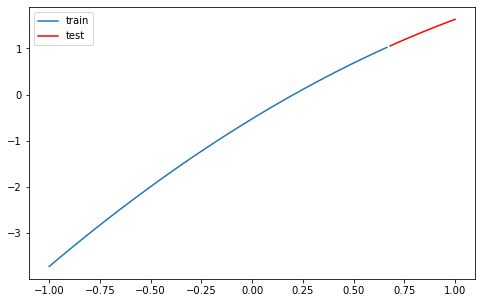

In [12]:
x_train, x_test, y_train, y_test, true_w = func_1()

plt.figure(figsize=(8, 5))
plt.plot(x_train, y_train, label='train')
plt.plot(x_test, y_test, c='r', label='test')
plt.legend()
plt.show()

function: 1/(2-x)^2


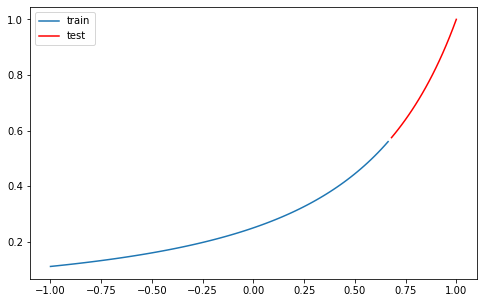

In [13]:
x_train, x_test, y_train, y_test = func_2()

plt.figure(figsize=(8, 5))
plt.plot(x_train, y_train, label='train')
plt.plot(x_test, y_test, c='r', label='test')
plt.legend()
plt.show()

## Batch gradient descent / Mini-batch gradient descent

function: -1.77*x^2 + 1.48*x + -1.12
predicted: -0.7*x^2 + 1.35*x + -1.14


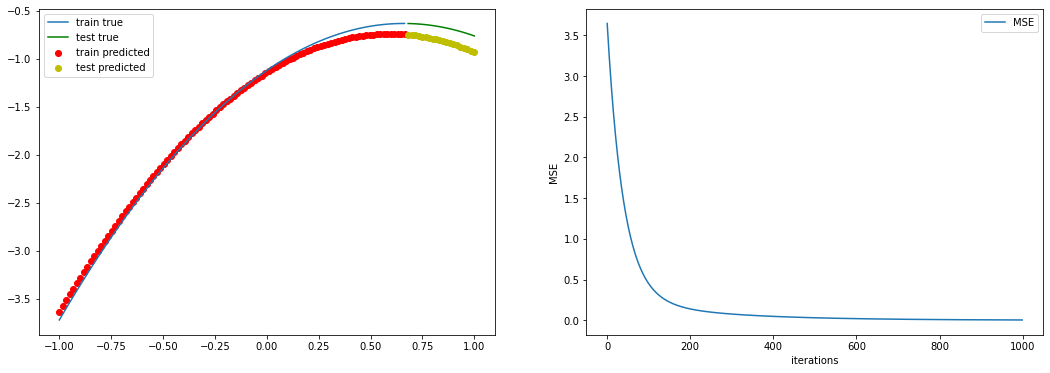

In [23]:
x_train, x_test, y_train, y_test, true_w = func_1()

w, e = gradient_decent(x_train, y_train, n_iter=1000, learning_rate=0.01)
y_pred = predict(x_train, w)

print(f'predicted: {round(w[2],2)}*x^2 + {round(w[1],2)}*x + {round(w[0],2)}')

plot_results(x_train, y_train, x_test, y_test, w, e)

function: 1/(2-x)^2
predicted: -0.06*x^2 + 0.28*x + 0.23


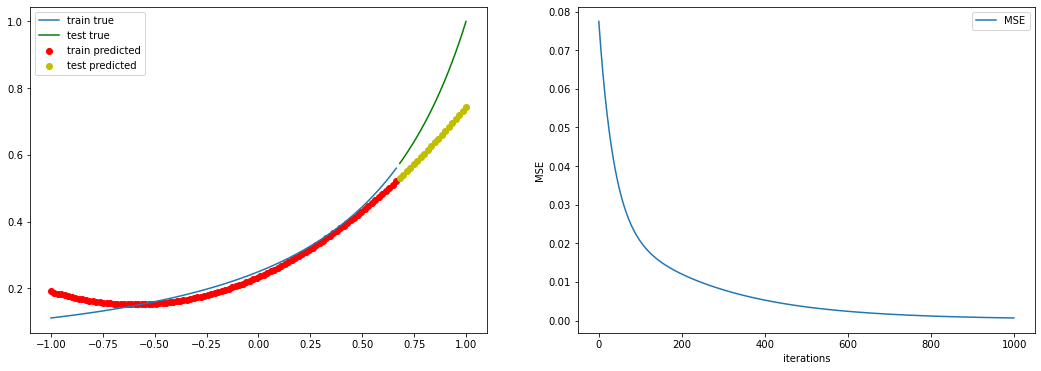

In [31]:
x_train, x_test, y_train, y_test = func_2()

w, e = gradient_decent(x_train, y_train, batch_size=4, n_iter=1000, learning_rate=0.01)
y_pred = predict(x_train, w)

print(f'predicted: {round(w[2],2)}*x^2 + {round(w[1],2)}*x + {round(w[0],2)}')

plot_results(x_train, y_train, x_test, y_test, w, e)

## Stochastic Average Gradient

For $t=1, \ldots, $ until convergence

1. Pick $i_t$ uniformly at random in $\{1, \ldots, n\}$

2. Update the average of gradients
$$
G_t \gets \frac 1n \sum_{i=1}^n g_i^t
$$
where 
$$
g_i^t =
\begin{cases}
    \nabla f_{i}(x_t) &\text{ if } i = i_t \\
    g_i^{t-1} & \text{ otherwise.}
\end{cases}
$$

3. Apply the step 
$$x_{t+1} \gets x_t - \eta G_t$$
where $\eta$ is the step-size.


Early stopping on N=230...
MSE: 0.0004873313640029891
predicted: -1.34*x^2 + 1.52*x + -1.11


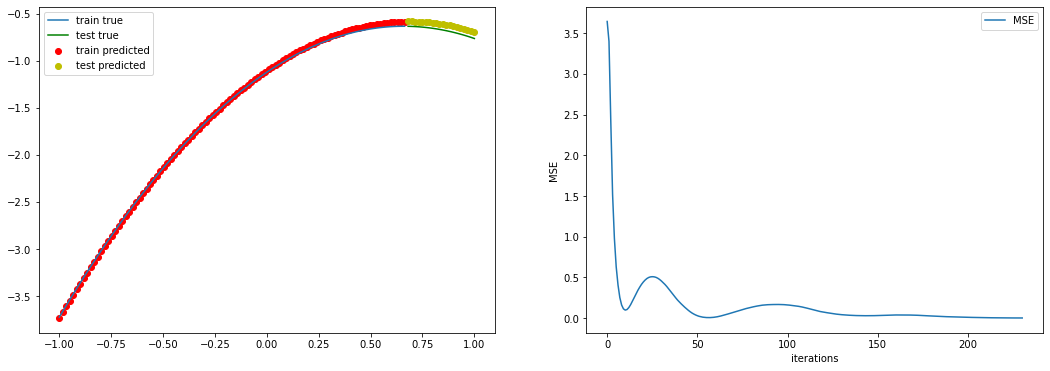

In [30]:
# x_train, x_test, y_train, y_test, true_w = func_1()

w, e = SAG(x_train, y_train, alpha=0.01, n_iter=1000, learning_rate=0.1)
y_pred = predict(x_train, w)

print(f'predicted: {round(w[2],2)}*x^2 + {round(w[1],2)}*x + {round(w[0],2)}')

plot_results(x_train, y_train, x_test, y_test, w, e)

Early stopping on N=439...
MSE: 0.0004924247066121196
predicted: -0.15*x^2 + 0.34*x + 0.24


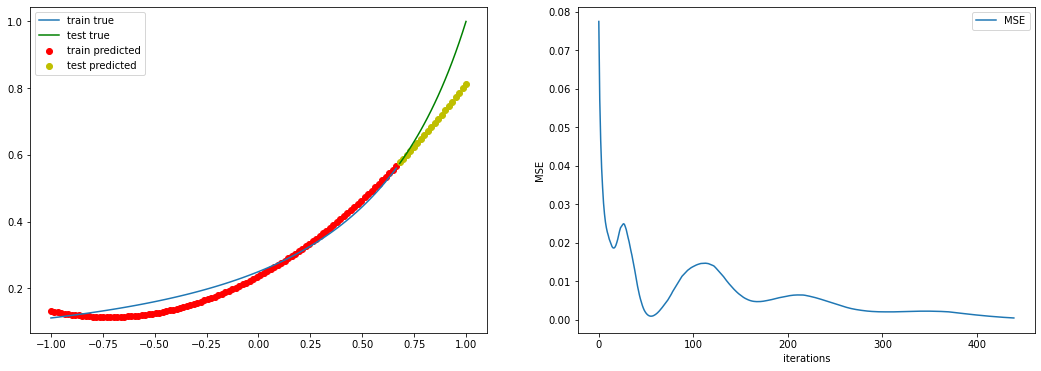

In [32]:
# x_train, x_test, y_train, y_test = func_2()

w, e = SAG(x_train, y_train, n_iter=1000, learning_rate=0.1)
y_pred = predict(x_train, w)

print(f'predicted: {round(w[2],2)}*x^2 + {round(w[1],2)}*x + {round(w[0],2)}')

plot_results(x_train, y_train, x_test, y_test, w, e)

function: -1.51*x^2 + 0.37*x + -0.52
Early stopping on N=7...
MSE: 0.00039914048863144534
predicted: -0.3*x^2 + 0.38*x + -0.53


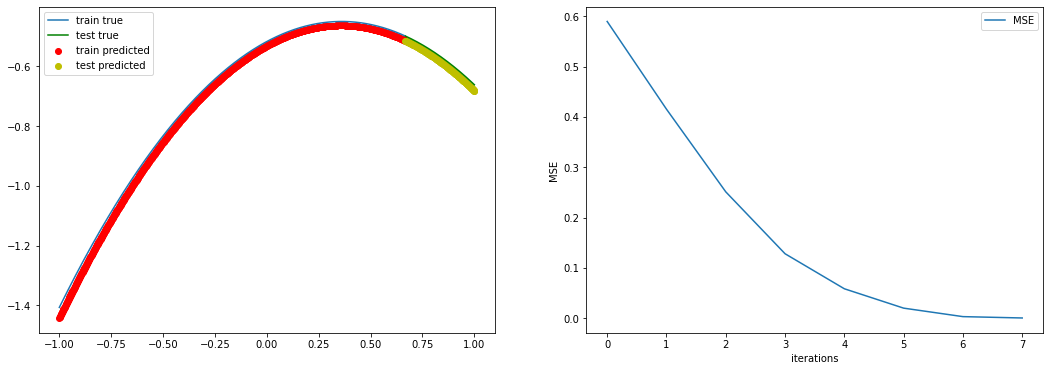

In [33]:
x_train, x_test, y_train, y_test, true_w = func_1(n_train=1000, n_test=200)

w, e = SAG(x_train, y_train, n_iter=10000, learning_rate=0.1)
y_pred = predict(x_train, w)

print(f'predicted: {round(w[2],2)}*x^2 + {round(w[1],2)}*x + {round(w[0],2)}')

plot_results(x_train, y_train, x_test, y_test, w, e)

function: 1/(2-x)^2
Early stopping on N=57...
MSE: 0.00045972778479324417
predicted: 0.05*x^2 + 0.3*x + 0.24


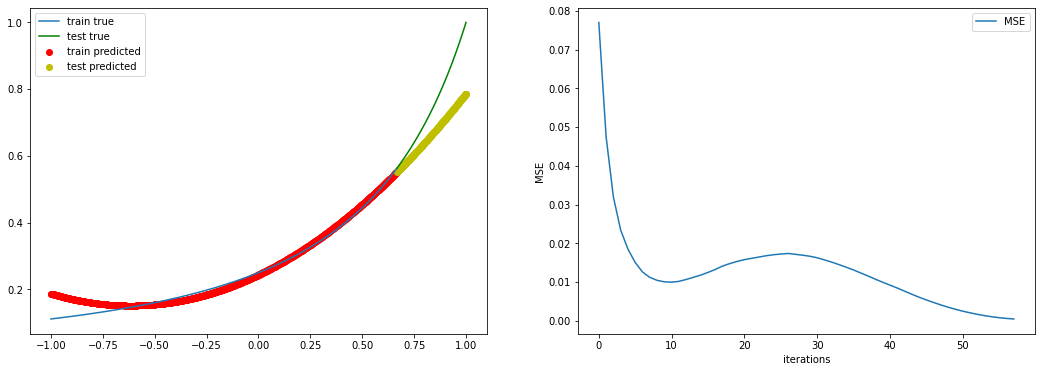

In [34]:
x_train, x_test, y_train, y_test = func_2(n_train=1000, n_test=200)

w, e = SAG(x_train, y_train, n_iter=10000, learning_rate=0.1)
y_pred = predict(x_train, w)

print(f'predicted: {round(w[2],2)}*x^2 + {round(w[1],2)}*x + {round(w[0],2)}')

plot_results(x_train, y_train, x_test, y_test, w, e)

## Влияние скорости обучения на сходимость

function: -2.04*x^2 + 0.94*x + 1.22


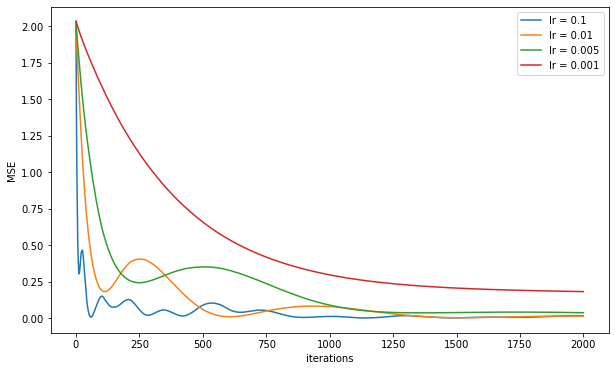

In [35]:
x_train, x_test, y_train, y_test, true_w = func_1(n_train=1000, n_test=200)

plt.figure(figsize=(10,6))

for learning_rate in [0.1, 0.01, 0.005, 0.001]:
    
    w, e = SAG(x_train, y_train, alpha=0.01, n_iter=2000, control_e=False, learning_rate=learning_rate)
    plt.plot(e, label=f'lr = {learning_rate}')

plt.xlabel('iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()


## Влияние параметра alpha L2 регуляризации на сходимость

function: -0.39*x^2 + 1.84*x + -0.42


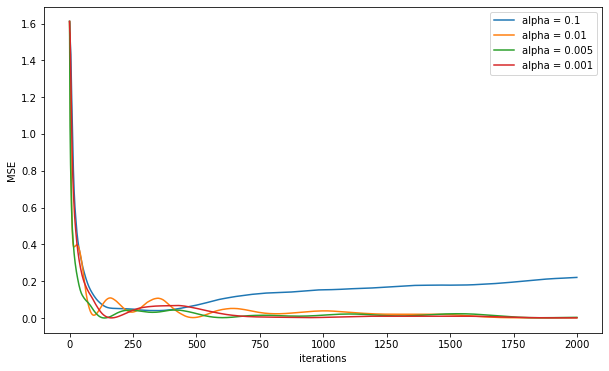

In [39]:
x_train, x_test, y_train, y_test, true_w = func_1(n_train=1000, n_test=200)

plt.figure(figsize=(10,6))

for alpha in [0.1, 0.01, 0.005, 0.001]:
    
    w, e = SAG(x_train, y_train, alpha=alpha, n_iter=2000, control_e=False, learning_rate=0.05)
    plt.plot(e, label=f'alpha = {alpha}')

plt.xlabel('iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()


## Сравним изменение функции потерь двух алгоритмов

function: -0.87*x^2 + 0.29*x + 2.79


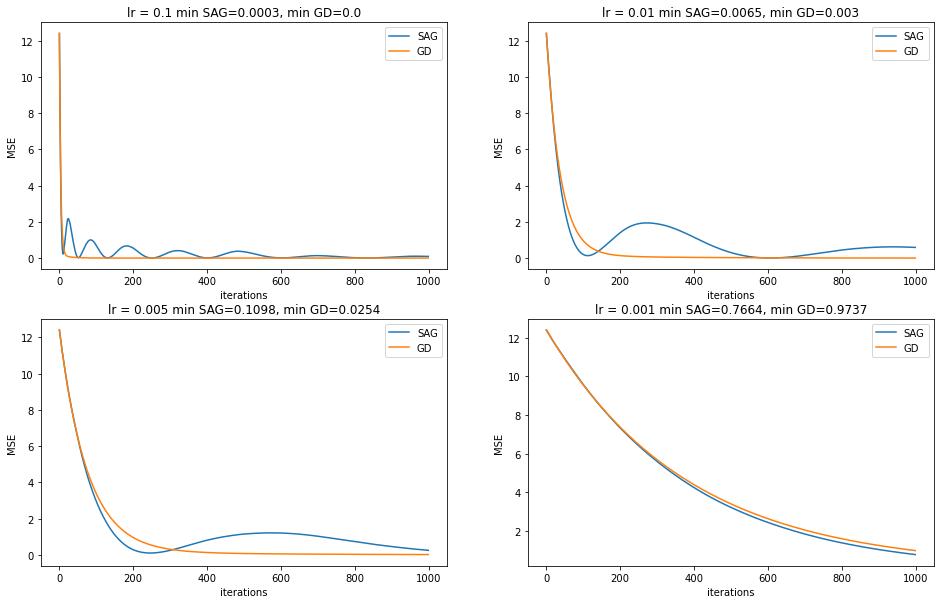

In [37]:
x_train, x_test, y_train, y_test, true_w = func_1(n_train=1000, n_test=200)

plt.figure(figsize=(16,10))
i = 1

for learning_rate in [0.1, 0.01, 0.005, 0.001]:
    
    plt.subplot(2, 2, i)
    w, e = SAG(x_train, y_train, n_iter=1000, control_e=False, learning_rate=learning_rate)
    w2, e2 = gradient_decent(x_train, y_train, control_e=False, n_iter=1000, learning_rate=learning_rate)

    plt.plot(e, label='SAG')
    plt.plot(e2, label='GD')
    plt.title(f'lr = {learning_rate} min SAG={round(min(e),4)}, min GD={round(min(e2),4)}')

    plt.xlabel('iterations')
    plt.ylabel('MSE')
    plt.legend()
    i+=1

plt.show()
